In [1]:
! git clone https://github.com/alex-trapp/scAge.git

Cloning into 'scAge'...
remote: Enumerating objects: 331, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 331 (delta 67), reused 7 (delta 1), pack-reused 219
Receiving objects: 100% (331/331), 621.53 MiB | 35.48 MiB/s, done.
Resolving deltas: 100% (148/148), done.
Checking out files: 100% (70/70), done.


In [2]:
import sys
sys.path.append('/content/scAge')
import scAge
import numpy as np
import pandas as pd
import os
import subprocess

# Process Coverage
- Demonstrates how to load and process .cov/.cov.gz single-cell methylome files generated by Bismark into binarized methylation matrices that are required as input to the `run_scAge` function.

## Check coverage files


In [3]:
# designate input directory of .cov files
input_coverage_directory = "/content/scAge/sc_data_raw/"

# get .cov files
input_coverage_files = sorted(os.listdir(input_coverage_directory))

# remove ".ipynb_checkpoints" file if present
if ".ipynb_checkpoints" in input_coverage_files:
    input_coverage_files.remove(".ipynb_checkpoints")
    os.rmdir(input_coverage_directory + ".ipynb_checkpoints")
print("Coverage file input directory: '%s'" % input_coverage_directory)

# cycle through .cov files
for count, file in enumerate(input_coverage_files):
    print("\tRaw .cov file #%s --> '%s'" % (count + 1, file))
    
# denote output path for processed .tsv files
output_path = "/content/scAge/sc_data_processed/"
print("\nProcessed file output directory: '%s'" % output_path)

Coverage file input directory: '/content/scAge/sc_data_raw/'
	Raw .cov file #1 --> 'SRR3136624_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #2 --> 'SRR3136625_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #3 --> 'SRR3136626_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #4 --> 'SRR3136627_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #5 --> 'SRR3136628_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #6 --> 'SRR3136629_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #7 --> 'SRR3136630_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #8 --> 'SRR3136631_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #9 --> 'SRR3136634_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #10 --> 'SRR3136635_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #11 --> 'SRR3136646_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #12 --> 'SRR3136647_bismark_bt2.deduplicated.bismark.cov.gz'
	Raw .cov file #13 --> 'SRR3136651_b

## Process coverage files


In [4]:
# run process_coverage
scAge.process_coverage(cov_directory = input_coverage_directory,
                       n_cores = 12,
                       max_met = 100,
                       split = '_',
                       chunksize = 1,
                       binarization = 'round',
                       output_path = output_path)

print('\nCompressing output .tsv files')
rm_previous_gzip = subprocess.run('rm %s*.gz' % output_path, shell=True)
gzip_out = subprocess.run('gzip -v %s*' % output_path, shell=True)
print('Binary methylation matrices compressed!')

process_coverage function starting!

----------------------------------------------------------
Loading .cov files from '/content/scAge/sc_data_raw/'
Number of Bismark .cov files = 26
First .cov file name: 'SRR3136624_bismark_bt2.deduplicated.bismark.cov.gz'
----------------------------------------------------------

----------------------------------------------------------
Starting parallel loading and processing of .cov files...


Single-cell loading progress :   0%|          | 0/26 [00:00<?, ? cell methylomes/s]


Parallel loading complete!
Processed binary methylation matrices written to '/content/scAge/sc_data_processed/'
----------------------------------------------------------

Time elapsed to process coverage files = 179.284 seconds

process_coverage run complete!

Compressing output .tsv files
Binary methylation matrices compressed!


# Create Reference

This notebook demonstrates how to create a reference dataset of linear associations between CpGs and age. 

The function construct_reference() takes as input a methylation matrix, with samples as rows and CpGs as columns. The matrix must contain at least one additional column labeled "Age", but may contain other metadata columns as well. 

An example matrix consisting of 29 C57BL/6J RRBS bulk liver samples from the (Thompson et al, 2018) study across 748,955 CpGs is available as a compressed HDF file in the bulk folder.

In [5]:
import scipy.stats as ss

## Load training DNAm matrix

In [6]:
# designate full path to training matrix
training_DNAm_matrix_path = "/content/scAge/bulk/Thompson_Liver_BL6_bulk_matrix.h5.gz"
print("Training matrix path: '%s'" % training_DNAm_matrix_path)

# unzip trainig matrix
print("Decompressing training matrix...")
gunzip_matrix = subprocess.run("gzip -dk %s" % training_DNAm_matrix_path,
                               shell = True)
print("Training matrix decompressed!")

# read in training matrix
print("Reading in training matrix...")
training_DNAm_matrix = pd.read_hdf(training_DNAm_matrix_path[:-3])

# check matrix dimensions and characteristics
print("\nTraining matrix characteristics:")
print("Number of samples = {:,}".format(len(training_DNAm_matrix)))
number_of_CpGs = len([x for x in training_DNAm_matrix.columns if "chr" in x])
print("Number of CpGs = {:,}".format(number_of_CpGs))
print("Sample distribution:")
pd.DataFrame(training_DNAm_matrix.loc[:, ["Strain", "Age", "Gender"]].value_counts().sort_index(),
             columns = ["Count"])

Training matrix path: '/content/scAge/bulk/Thompson_Liver_BL6_bulk_matrix.h5.gz'
Decompressing training matrix...
Training matrix decompressed!
Reading in training matrix...


ValueError: ignored

## Create reference dataset


In [ ]:
# designate output path
output_path = "/content/scAge/train/Thompson_Liver_BL6.tsv"
print("Selected output path: '%s'\n" % output_path)

# run construct_reference
# note that progress bars only display correctly 
# when the notebook runs, and not on a static notebook
scAge.construct_reference(training_DNAm_matrix = training_DNAm_matrix,
                          output_path = output_path,
                          n_cores = 30,
                          chunksize = 200)

# gzip output .tsv file
print("Compressing reference file...")
gzip_ref = subprocess.run("gzip -vf %s" % output_path, shell = True)
print("Reference file compressed!")

# Run scAge
This notebook demonstrates how to execute the core function of the framework, run_scAge. This function takes as input processed binary methylation matrices (generated by process_coverage) and a reference dataset of bulk-derived models (generated by construct_reference), and outputs predicted epigenetic ages for single cells. 

Processed single-cell methylation profiles from the (Gravina et al, 2016) study are provided as an example in sc_data_processed, and a pre-processed C57BL/6J liver reference dataset from the (Thompson et al, 2018) study is provided in train.

## Check single-cell and reference data


In [7]:
# check single-cell data
sc_directory = "/content/scAge/sc_data_processed/"
print("Single-cell input path: '%s'" % sc_directory)
sc_methylome_profiles = sorted(os.listdir(sc_directory))
if ".ipynb_checkpoints" in sc_methylome_profiles:
    os.rmdir(sc_directory + ".ipynb_checkpoints")
    sc_methylome_profiles.remove(".ipynb_checkpoints")
for count, profile in enumerate(sc_methylome_profiles):
    count = count + 1
    print("\tSingle-cell profile #%s: %s" % (count, profile))
      
# check bulk training data
train_directory = "/content/scAge/train/"
reference_file = "Thompson_Liver_BL6.tsv.gz"
full_reference_path = train_directory + reference_file
print("\nTraining reference data input path: %s" % full_reference_path)

# denote an output path
output_path = "/content/scAge/predictions/"
print("\nOutput path: '%s'" % output_path)

Single-cell input path: '/content/scAge/sc_data_processed/'
	Single-cell profile #1: SRR3136624.tsv.gz
	Single-cell profile #2: SRR3136625.tsv.gz
	Single-cell profile #3: SRR3136626.tsv.gz
	Single-cell profile #4: SRR3136627.tsv.gz
	Single-cell profile #5: SRR3136628.tsv.gz
	Single-cell profile #6: SRR3136629.tsv.gz
	Single-cell profile #7: SRR3136630.tsv.gz
	Single-cell profile #8: SRR3136631.tsv.gz
	Single-cell profile #9: SRR3136634.tsv.gz
	Single-cell profile #10: SRR3136635.tsv.gz
	Single-cell profile #11: SRR3136646.tsv.gz
	Single-cell profile #12: SRR3136647.tsv.gz
	Single-cell profile #13: SRR3136651.tsv.gz
	Single-cell profile #14: SRR3136652.tsv.gz
	Single-cell profile #15: SRR3136653.tsv.gz
	Single-cell profile #16: SRR3136654.tsv.gz
	Single-cell profile #17: SRR3136655.tsv.gz
	Single-cell profile #18: SRR3136656.tsv.gz
	Single-cell profile #19: SRR3136657.tsv.gz
	Single-cell profile #20: SRR3136658.tsv.gz
	Single-cell profile #21: SRR3136659.tsv.gz
	Single-cell profile #22:

In [8]:
scAge.run_scAge(single_cell_dir_or_dict = sc_directory,
                single_cell_set_name = "Gravina_Test",
                reference_data = full_reference_path,
                selection_mode = "percentile",
                CpG_parameter = 1,
                zero_met_replacement = 0.001,
                one_met_replacement = 0.999,
                min_age = -20,
                max_age = 60,
                age_step = 0.1,
                n_cores = 12,
                uncertainty = 1,
                output_path = output_path,
                chunksize = 1)

scAge algorithm starting!

----------------------------------------------------------
Profiling epigenetic age in 'Gravina_Test' single-cell data...
Loading processed binary methylation files from '/content/scAge/sc_data_processed/'...
Number of single cells to analyze: 26
----------------------------------------------------------

scAge parameters:
----------------------------------------------------------
Using reference training data: Thompson_Liver_BL6
Shape of reference matrix: 743,078 CpGs, 4 metric columns


Using 12 cores with chunksize of 1


Setting minimum age to -20 month(s)
Setting maximum age to 60 month(s)
Using age step of 0.1 month(s)


Replacing modeled bulk methylation ≤ 0 with 0.001
Replacing modeled bulk methylation ≥ 1 with 0.999


Using profiling mode: percentile
--> Profiling top 1% age-related CpGs by absolute Pearson correlation 

Using a prediction uncertainty metric of +/- 1 for confidence interval computation
------------------------------------------------

scAge progress :   0%|          | 0/26 [00:00<?, ? age predictions/s]




Predictions stored in '/content/scAge/predictions/'
----------------------------------------------------------

Time elapsed to generate scAge results = 498.349 seconds

scAge run complete!


In [9]:
output_files = sorted(os.listdir(output_path))
counter = 1
print("Output files generated:")
for file in output_files:
    if ".tsv" in file:
        print(str(counter) + ") " + file)
        counter += 1

# load in predictions
test_predictions = pd.read_csv(output_path + \
                               "Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv",
                               sep = "\t",
                               index_col = 0)

# load in metadata
meta_path = "/content/scAge/meta/Gravina_meta.tsv"
meta = pd.read_csv(meta_path,
                   sep = "\t", index_col = 0)

# getting final dataframe
test_predictions = test_predictions.join(meta)
print("\nDimensions of predictions matrix = {} cells by {} attributes".format(*test_predictions.shape))
test_predictions.head(3)

Output files generated:
1) Gravina_Test-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv

Dimensions of predictions matrix = 26 cells by 21 attributes


,PredictedAge,MeanMet,CellCoverage,Intersections,AgesTested,AgeLikelihood,SelectedCpGs,NumberCpGs,Correlations,RegressionCoefs,RegressionIntercepts,MethylationValues,LowerBound,UpperBound,Sample Name,Tissue,Age(str),Age(num),Type,Animal,Tissue-Age
Cell,,,,,,,,,,,,,,,,,,,,,
SRR3136624,3.2,0.614062,3646293,95690,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-819.1790175098466, -817.354716739173, -815.6...","['chr1_4492602', 'chr1_4492624', 'chr1_9968104...",957,"[0.6768475153891691, 0.7122506967583091, 0.678...","[0.002592221432608418, 0.0023347171304051984, ...","[0.016290785257734548, 0.016934743206038518, 0...","[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, ...",2.0,4.5,f11,MEF,NaN,NaN,singleCell,f1,MEF
SRR3136625,0.9,0.638897,2277912,71874,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-427.6590460212319, -427.2253173898112, -426....","['chr1_10993855', 'chr1_10993876', 'chr1_25830...",719,"[0.6721603982132983, 0.6734012740470863, 0.636...","[0.0009925431871433646, 0.0015295468162764812,...","[-0.002621402355471803, -0.0007775734535147849...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, ...",0.2,2.1,f23,MEF,NaN,NaN,singleCell,f2,MEF
SRR3136626,1.1,0.634295,3183103,99834,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-700.0813303262659, -697.9675295617743, -696....","['chr1_10993855', 'chr1_10993876', 'chr1_10993...",999,"[0.6721603982132983, 0.6734012740470863, 0.616...","[0.0009925431871433646, 0.0015295468162764812,...","[-0.002621402355471803, -0.0007775734535147849...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...",0.3,2.2,f22,MEF,NaN,NaN,singleCell,f2,MEF


In [12]:
! pip install statannot

Statistical testing metrics:
MEF v.s. Hepatocyte
(4 month): Welch's t-test independent samples with Bonferroni correction, P_val=9.388e-02 stat=-2.220e+00
Hepatocyte
(4 month) v.s. Hepatocyte
(26 month): Welch's t-test independent samples with Bonferroni correction, P_val=4.470e-07 stat=-8.028e+00


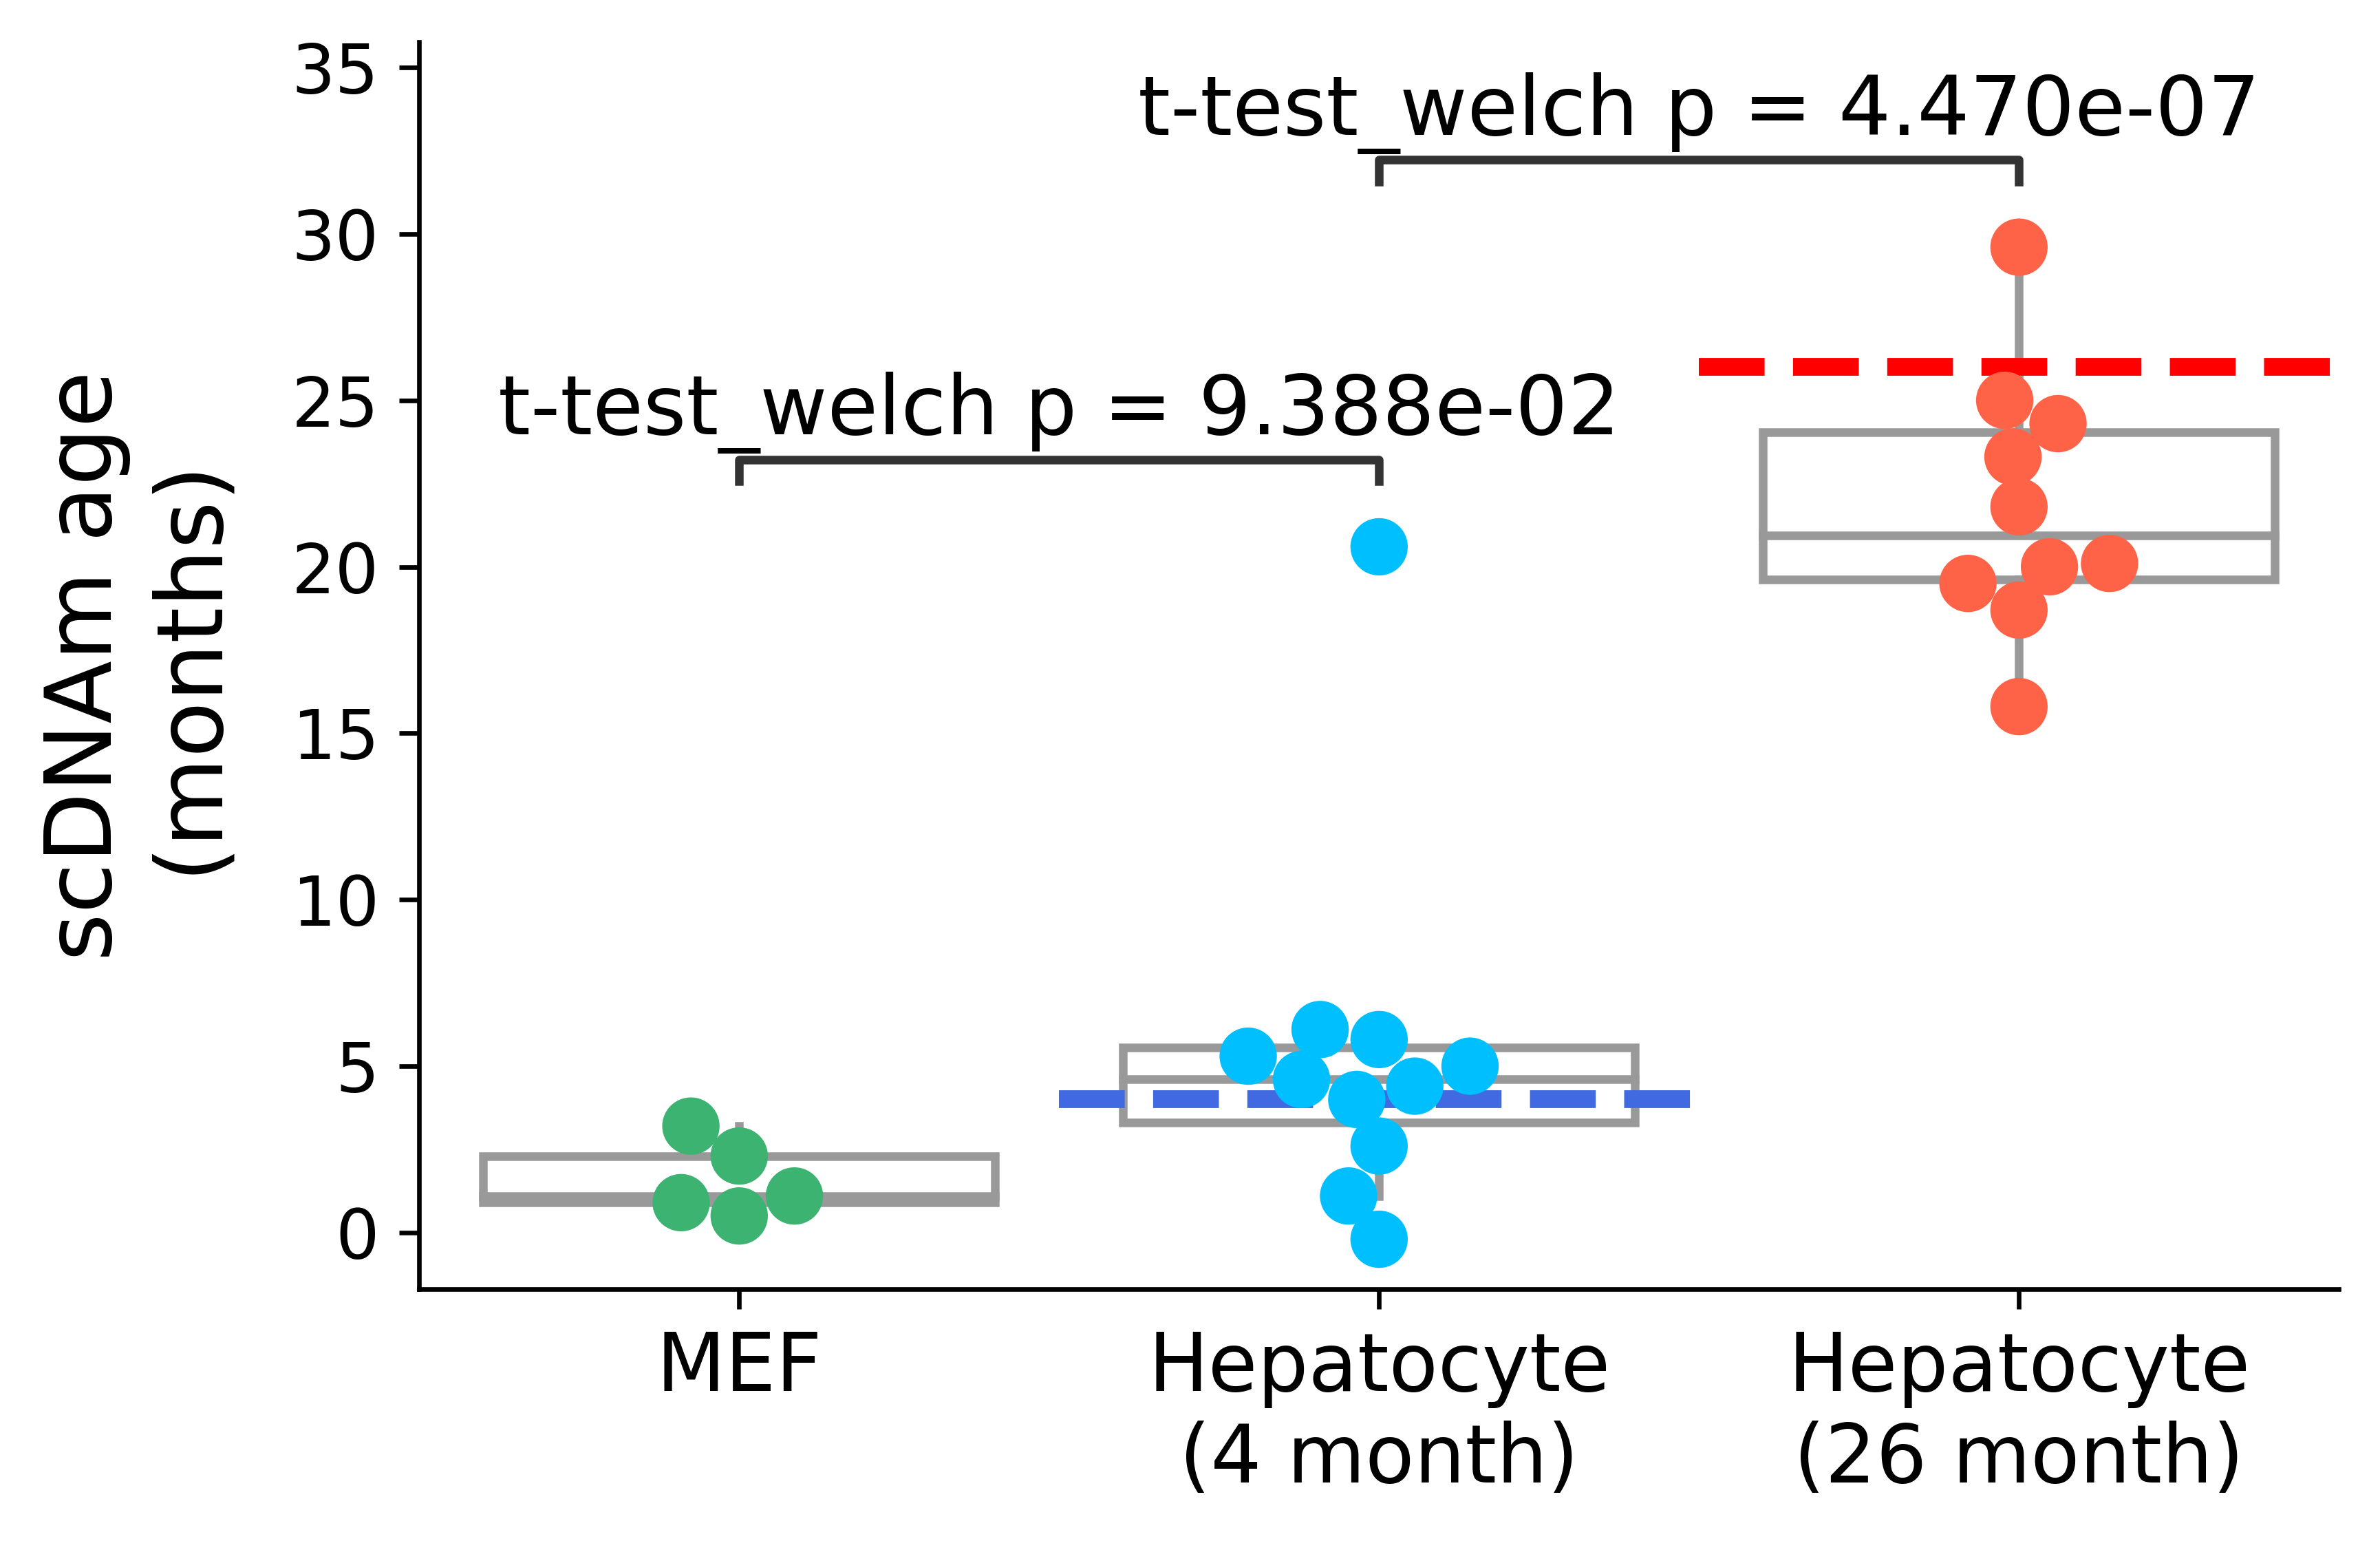

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import statannot
# plot predicted ages
fig, ax = plt.subplots(dpi = 600)

order = ["MEF", "Hepatocyte\n(4 month)", "Hepatocyte\n(26 month)"]
palette = ["mediumseagreen", "deepskyblue", "tomato"]
x = "Tissue-Age"
y = "PredictedAge"
box_pairs = [("MEF", "Hepatocyte\n(4 month)"),
             ("Hepatocyte\n(4 month)", "Hepatocyte\n(26 month)")]

sns.boxplot(x = x,
            y = y,
            data = test_predictions,
            order = order,
            color = "white",
            showfliers = False,
            showcaps = False)
sns.swarmplot(x = x,
              y = y,
              data = test_predictions,
              order = order,
              palette = palette,
              s = 10)
print("Statistical testing metrics:")
statannot.add_stat_annotation(ax = ax,
                              data = test_predictions,
                              x = x,
                              y = y,
                              order = order,
                              box_pairs = box_pairs,
                              test = "t-test_welch", text_format='full',
                              loc = 'inside', verbose = 1,
                              comparisons_correction = 'bonferroni',
                              fontsize = "x-large")
plt.plot([0.5, 1.5], [4, 4], linestyle = "--", linewidth = 3.1, color = "royalblue")
plt.plot([1.5, 2.5], [26, 26], linestyle = "--", linewidth = 3.1, color = "red")
sns.despine()
plt.ylabel("scDNAm age\n(months)", fontsize = 16, labelpad = 10)
plt.xlabel("")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12);